### **Polynomial Regression based Machine Learning approach for prediction of penetration depth in Friction Stir Spot Welding Process**
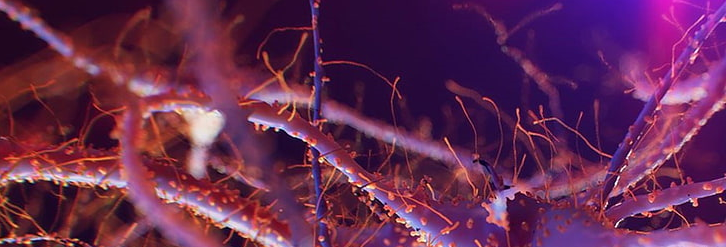

The first step is to load the Python libraries with the help of below code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

The second step is to load the dataset used for the research purpose with the help of following code:

In [2]:
tensile= pd.read_csv('Fsim.csv')

In [3]:
tensile.head()


,Rotational Speed,Dwelling Time,Axial Load,Temperature,Max Depth
0,1000,10,110,270,3.50
1,1000,10,120,279,4.01
2,1000,10,130,297,4.65
3,1000,20,110,292,3.96
4,1000,20,120,294,4.47


In [4]:
tensile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rotational Speed  27 non-null     int64  
 1   Dwelling Time     27 non-null     int64  
 2   Axial Load        27 non-null     int64  
 3   Temperature       27 non-null     int64  
 4   Max Depth         27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [5]:
tensile.describe()

,Rotational Speed,Dwelling Time,Axial Load,Temperature,Max Depth
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1500.000000,20.000000,120.000000,323.370370,4.875556
std,416.025147,8.320503,8.320503,27.174858,0.635134
min,1000.000000,10.000000,110.000000,270.000000,3.500000
25%,1000.000000,10.000000,110.000000,304.000000,4.460000
50%,1500.000000,20.000000,120.000000,322.000000,4.920000
75%,2000.000000,30.000000,130.000000,346.000000,5.305000
max,2000.000000,30.000000,130.000000,380.000000,6.000000


In [6]:
tensile.columns

Index(['Rotational Speed', 'Dwelling Time', 'Axial Load', 'Temperature',
       'Max Depth'],
      dtype='object')

Percforming Exploratory Data Analysis

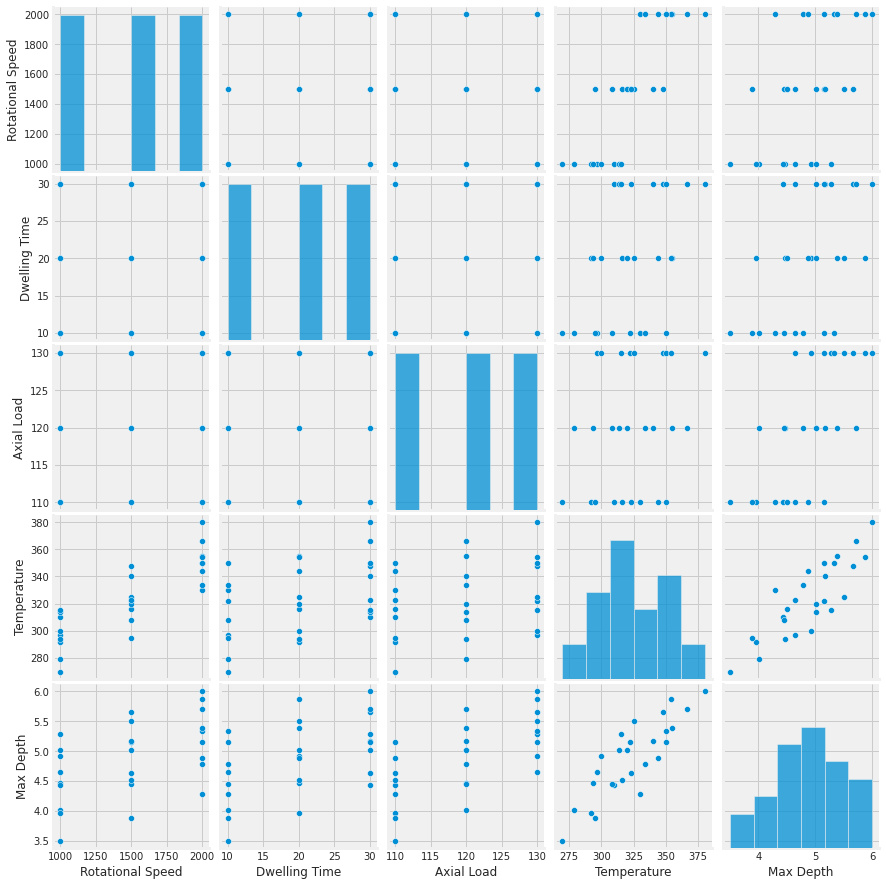

In [7]:
sns.pairplot(tensile)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


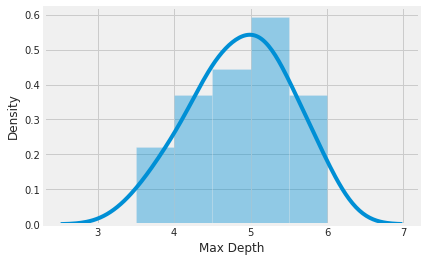

In [8]:
sns.distplot(tensile['Max Depth'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


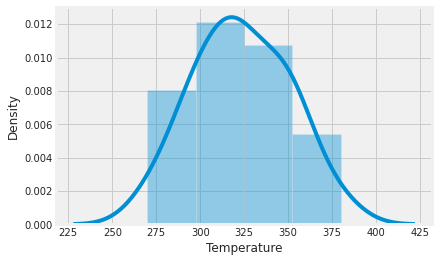

In [8]:
sns.distplot(tensile['Temperature'])

The code to plot the heatmap is shown below:

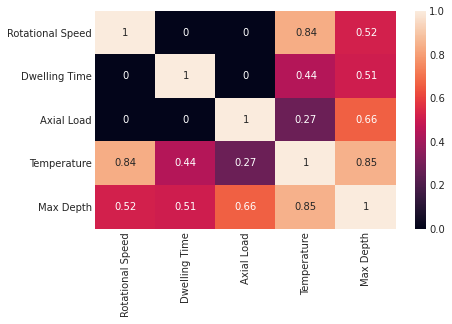

In [9]:
sns.heatmap(tensile.corr(), annot=True)

The next step is to alot the input features and output features in the given dataset. In the dataset Rotational Speed (RPM), Axial load (kg), Dwelling time (seconds) and Temperature generated (Celsius) are input parameters while the penetration depth is the output parameter. This can be done with the help of below code:

In [46]:
X = tensile[['Rotational Speed', 'Dwelling Time', 'Axial Load']]
y = tensile['Temperature']

Now the dataset will be divided into 80-20 ratio. That means 80 percent of the data will be trained and 20 percent data will be tested from the dataset. The below code creates the Train-Test model.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Now rescaling of the input variables is done with the help of standardization or normalization.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Now model evaluation is performed.

In [51]:
# print the intercept
print(lin_reg.intercept_)

326.9047619047619


Now prediction task is performed.

In [52]:
pred = lin_reg.predict(X_test)

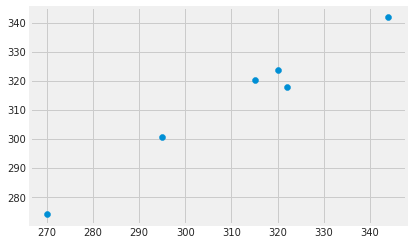

In [53]:
plt.scatter(y_test, pred)

Plot of residual histogram is shown below:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


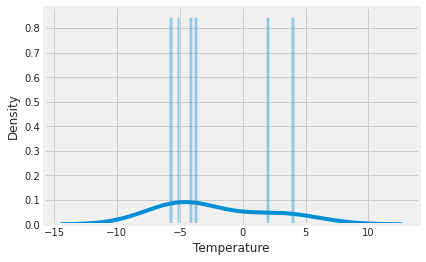

In [54]:
sns.distplot((y_test - pred), bins=50);

Now regression evaluation metrices is found out by following code:

In [55]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.168720657276992
MSE: 18.79496901449777
RMSE: 4.335316483775754
R2 Square 0.9652374185921743
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.9751285490722106
MSE: 20.5152442432372
RMSE: 4.529375701268023
R2 Square 0.9708428747397045
__________________________________


Now Let's print the results

In [56]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,4.168721,18.794969,4.335316,0.965237,-2.234517


Now let's implement Polynomial Regression model

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.603709750566878
MSE: 52.53932855162196
RMSE: 7.24840179292111
R2 Square 0.9028249163656807
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.9813488824101158
MSE: 13.380675521002077
RMSE: 3.657960568541175
R2 Square 0.9809828229385162
__________________________________


## **Artificial Neural Network Algorithm for prediction of Temperature and Maximum Depth**
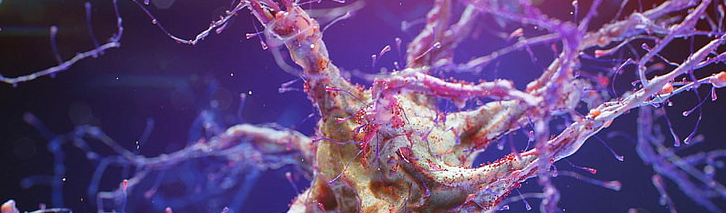

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=9000)

Streaming output truncated to the last 5000 lines.
Epoch 6501/9000
21/21 [==============================] - 0s 6ms/step - loss: 182.0429 - val_loss: 109.4163
Epoch 6502/9000
21/21 [==============================] - 0s 7ms/step - loss: 223.7088 - val_loss: 108.0095
Epoch 6503/9000
21/21 [==============================] - 0s 7ms/step - loss: 148.3648 - val_loss: 112.4898
Epoch 6504/9000
21/21 [==============================] - 0s 6ms/step - loss: 233.2090 - val_loss: 113.7270
Epoch 6505/9000
21/21 [==============================] - 0s 7ms/step - loss: 184.2597 - val_loss: 119.3549
Epoch 6506/9000
21/21 [==============================] - 0s 7ms/step - loss: 307.3285 - val_loss: 110.9042
Epoch 6507/9000
21/21 [==============================] - 0s 7ms/step - loss: 183.1961 - val_loss: 106.1205
Epoch 6508/9000
21/21 [==============================] - 0s 7ms/step - loss: 258.8319 - val_loss: 108.1296
Epoch 6509/9000
21/21 [==============================] - 0s 7ms/step - loss: 248.3795 - val_l

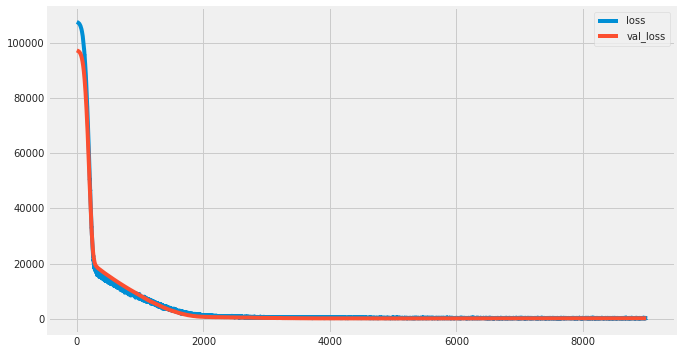

In [62]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [63]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.08489990234375
MSE: 134.57826102742305
RMSE: 11.600787086548182
R2 Square 0.7510882964967515
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.9389459519159224
MSE: 139.73732597544966
RMSE: 11.821054351260283
R2 Square 0.8013994535625368
__________________________________
